### IMPORT AND LOAD THE DATASET FROM KAGGLE

In [1]:
# import the necessary libraries:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import numpy as np
import pandas as pd
import datetime as dt
from encodings.aliases import aliases #contains the file of encodings

In [55]:
#download the file from the kaggle
od.download("https://www.kaggle.com/datasets/ddosad/auto-sales-data/data")

Skipping, found downloaded files in ".\auto-sales-data" (use force=True to force download)


In [3]:
#read and create the dataframe
df = pd.read_csv("auto-sales-data/Auto Sales data.csv")

### DATASET SUMMARY

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [5]:
#columns in the dataset
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [6]:
#size of the dataset
df.shape

(2747, 20)

In [7]:
#there are no duplicate values in the dataset, so not dropping any
df.duplicated().sum() #check the duplicate values

0

In [8]:
df.info() #quick info of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [9]:
df.isna().sum()  #there are no null values in the dataset.

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [10]:
#convert the data type of the orderdate
df.ORDERDATE = pd.to_datetime(df["ORDERDATE"],dayfirst = True)

In [11]:
# function defined to retun the lower case values:
def lower_case(dataframe):
    dataframe.columns = dataframe.columns.map(lambda x: x.lower())    

In [12]:
#call the function lower case to convert the column names
lower_case(df)

In [13]:
df.info() #check the data type,column name after conversion. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ordernumber           2747 non-null   int64         
 1   quantityordered       2747 non-null   int64         
 2   priceeach             2747 non-null   float64       
 3   orderlinenumber       2747 non-null   int64         
 4   sales                 2747 non-null   float64       
 5   orderdate             2747 non-null   datetime64[ns]
 6   days_since_lastorder  2747 non-null   int64         
 7   status                2747 non-null   object        
 8   productline           2747 non-null   object        
 9   msrp                  2747 non-null   int64         
 10  productcode           2747 non-null   object        
 11  customername          2747 non-null   object        
 12  phone                 2747 non-null   object        
 13  addressline1      

In [14]:
#rename the columns for readability:
df.rename(columns= {'ordernumber': 'order_number','quantityordered': 'quantity_ordered','priceeach':'price_per_unit','orderlinenumber':'orderline_number',
'orderdate':'order_date','customername':'customer_name','contactlastname':'last_name','contactfirstname':'first_name','msrp':'retail_price','dealsize':'deal_size','addressline1':'address','productcode':'product_code'},inplace=True)

In [15]:
df.describe() #numeric columns

,order_number,quantity_ordered,price_per_unit,orderline_number,sales,order_date,days_since_lastorder,retail_price
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,2019-05-13 21:56:17.211503360,1757.085912,100.691664
min,10100.000000,6.000000,26.880000,1.000000,482.130000,2018-01-06 00:00:00,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,2018-11-08 00:00:00,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,2019-06-24 00:00:00,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2019-11-17 00:00:00,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,2020-05-31 00:00:00,3562.000000,214.000000
std,91.877521,9.762135,42.042549,4.230544,1838.953901,NaN,819.280576,40.114802


In [16]:
#fetch the numerical columns in dataframe
num_cols = df.select_dtypes(include=['float64', 'int64']).drop(columns=['order_number'])

In [17]:
df.describe(include='object') #non numeric columns

,status,productline,product_code,customer_name,phone,address,city,postalcode,country,last_name,first_name,deal_size
count,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747,2747
unique,6,7,109,89,88,89,71,73,19,76,72,3
top,Shipped,Classic Cars,S18_3232,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,USA,Freyre,Diego,Medium
freq,2541,949,51,259,259,259,304,259,928,259,259,1349


In [18]:
#fetch the categorical columns in a dataframe
df_cat = df.select_dtypes(include = ['object']).drop(columns=['phone','address', 'last_name','first_name'])

In [19]:
# no of unique values in each column:
for col in df.columns:
    unique_values = df[col].nunique() #using nunique to find the unique columns count.
    print(col +':'+ str(unique_values))

order_number:298
quantity_ordered:58
price_per_unit:1843
orderline_number:18
sales:2690
order_date:246
days_since_lastorder:1832
status:6
productline:7
retail_price:80
product_code:109
customer_name:89
phone:88
address:89
city:71
postalcode:73
country:19
last_name:76
first_name:72
deal_size:3


In [20]:
df.head()

,order_number,quantity_ordered,price_per_unit,orderline_number,sales,order_date,days_since_lastorder,status,productline,retail_price,product_code,customer_name,phone,address,city,postalcode,country,last_name,first_name,deal_size
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


# EXPLORATORY DATA ANALYSIS

### DYNAMIC FUNCTIONS

In [21]:
"""description: dynamic function to return the aggregates
parameters: dataframe , column name , list of functions
return: dataframe
"""
def agg_stats(dataframe, col, funcs):
    stats_dfs =  []  # Create a list to store the results

    # loop the functions 
    for fname in funcs:
        if fname == "sum":
            stats_dfs.append(dataframe[col].agg("sum").rename(f"{col}_total"))
        elif fname == "count":
            stats_dfs.append(dataframe[col].agg("count").rename(f"{col}_count"))
        elif fname == "min":
            stats_dfs.append(dataframe[col].agg("min").rename(f"{col}_min"))
        elif fname == "max":
            stats_dfs.append(dataframe[col].agg("max").rename(f"{col}_max"))
        elif fname == "mean":
            stats_dfs.append(dataframe[col].agg("mean").rename(f"{col}_average"))
        elif fname == "mode":
            stats_dfs.append(dataframe[col].mode().rename(f"{col}_frequent"))
    
    result_df = pd.concat(stats_dfs, axis=1) #converting the list to dataframe.
    return result_df

In [53]:
"""description: dynamic function to return the visualization
parameters: dataframe 
return: plot
"""
def univariate_analysis(df):
    for col in df.columns:
        value_counts = df[col].value_counts()
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
        
        # Plot Pie Chart
        colors = plt.cm.tab20c.colors
        ax1.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=45, colors=colors , textprops={'fontsize': 8})
        ax1.set_title(f'Distribution - {col}')
        ax1.axis('equal')
        
        # Plot Bar Chart
        df[col].value_counts().plot(kind='bar', rot=45, color= colors, ax=ax2)
        ax2.set_title(f'Distribution - {col}')
        ax2.set_xlabel('Categories')
        ax2.set_ylabel('Count')
        # add values at the top
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
            
        # Adjust layout
        plt.tight_layout()

        # Show the plot for each column
        plt.show()

In [23]:
"""description: dynamic function to return the visualization
parameters: dataframe , column name , sales_column
return: plot
"""
def sales_distribution(data,column_name,sales):
    for colname in column_name:
        grouped_data = data.groupby(colname)
    
        # Calculate average and total sales
        average_sales = grouped_data[sales].mean()
        total_sales = grouped_data[sales].sum()
        #define the colors
        colors = plt.cm.tab20c.colors
        # Plot average sales
        plt.figure(figsize=(10,5))
        plt.subplot(1, 2, 1)
        bars = plt.bar(average_sales.index, average_sales,color=colors)
        plt.title(f'Average Sales by {colname}')
        plt.xlabel(colname)
        plt.ylabel('Average Sales')
        plt.xticks(rotation=90)

        # add values at the top
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
    
        # Plot total sales
        plt.subplot(1, 2, 2)
        plt.bar(total_sales.index, total_sales, color= colors)
        plt.title(f'Total Sales by {colname}')
        plt.xlabel(colname)
        plt.ylabel('Total Sales')
        plt.xticks(rotation=90)

        # add values at the top
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom',fontsize=8)
    
        # Adjust layout and show the plots
        plt.tight_layout()
    return plt.show()

In [43]:
"""description: dynamic function to return the visualization
parameters: dataframe , column name , legend
return: plot
"""
def multivariate_analysis(df, colname, legend):
    # Comparison between Sales, Product Line along with legend as Hue
    sns.set(style="white", rc={"figure.figsize": (15, 5)})
    df["SALES (K)"] = df["sales"] / 1000
    sns.barplot(data=df, x=colname, y="SALES (K)", hue=legend, palette="tab20c",errorbar=None)
    plt.title(f'Total Sales by {colname} and {legend}')
    plt.ylabel("SALES (K)", fontsize=10)
    plt.xlabel(colname, fontsize=10)
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():.1f}K', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)
    plt.legend(title=legend, fontsize=8, loc="upper left", bbox_to_anchor=(1, 1))
    return plt.show()

### UNIVARIATE ANALYSIS

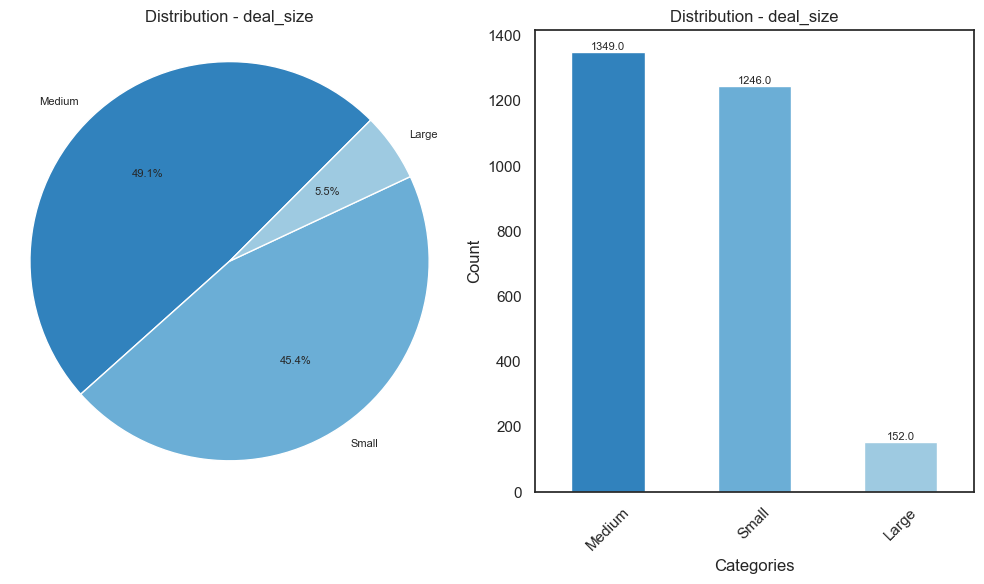

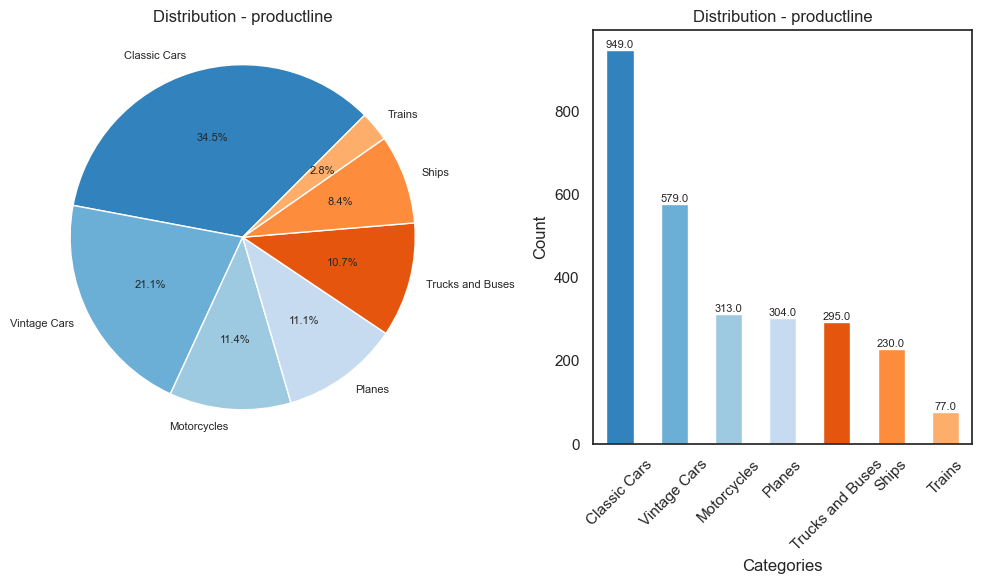

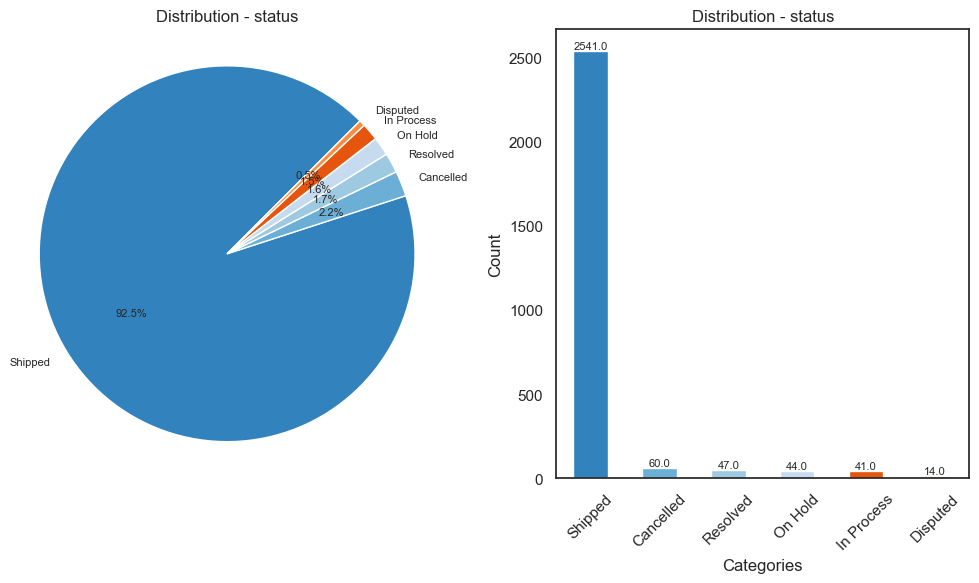

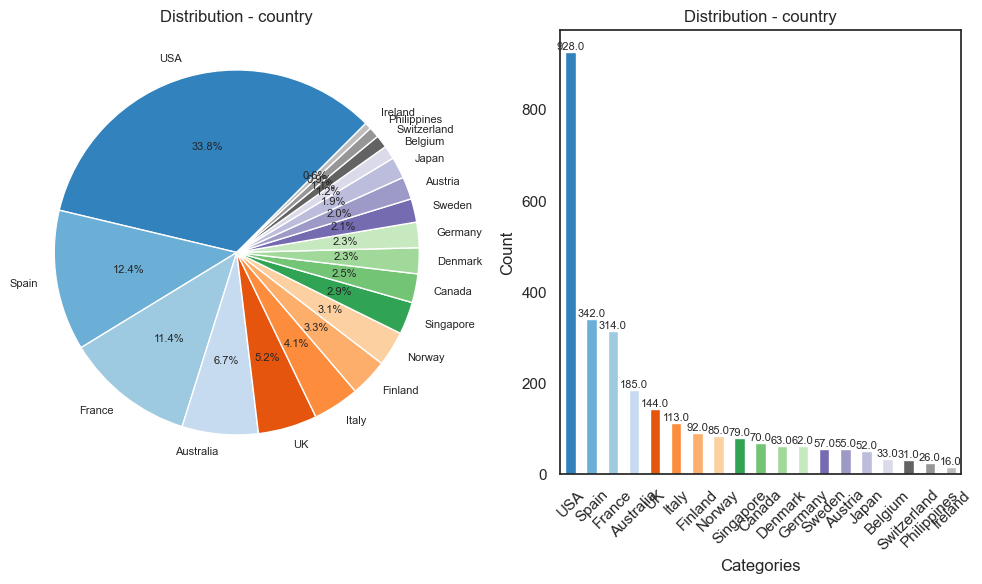

In [54]:
#define the dataframe
col_df = df[['deal_size','productline','status','country']]
#call the function
univariate_analysis(col_df)

### BIVARIATE ANALYSIS

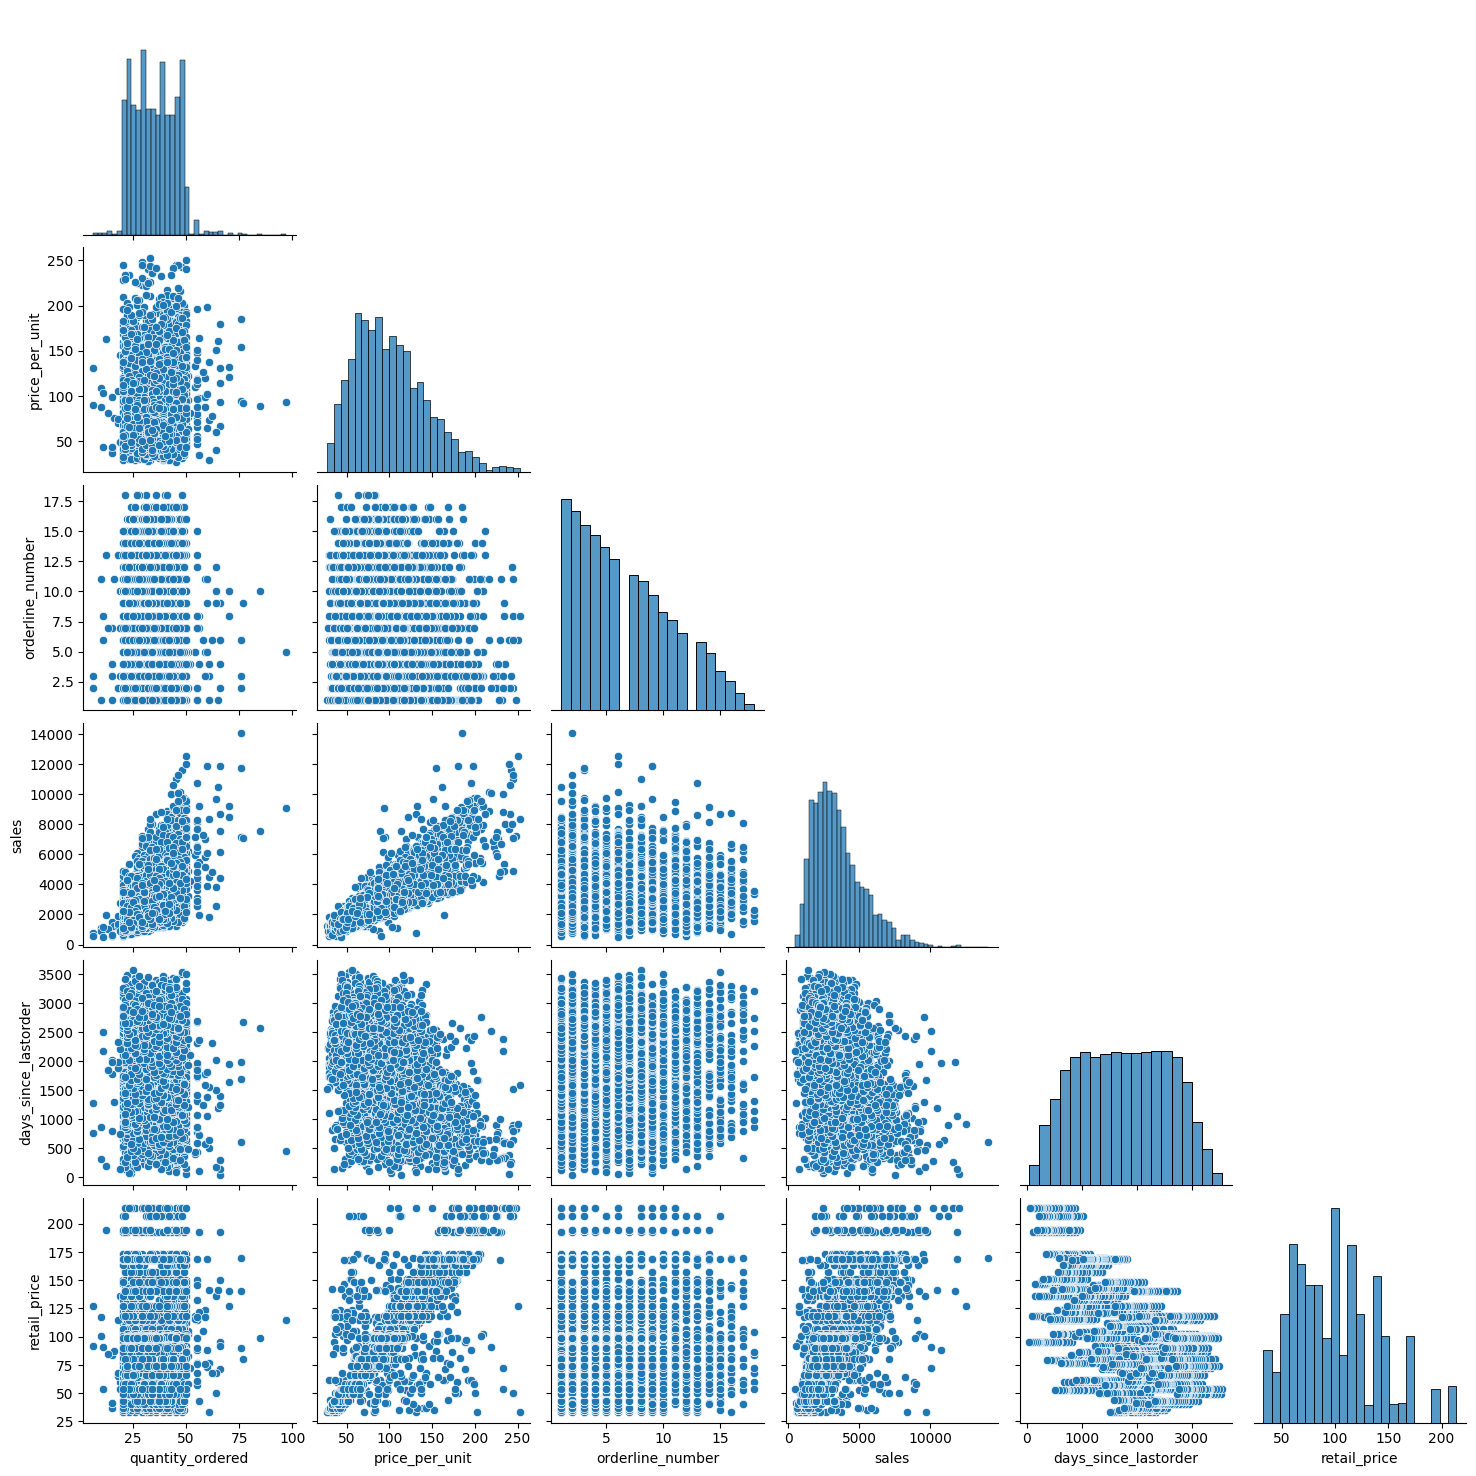

In [26]:
#for the num columns dataframe create a pair plot:
sns.pairplot(data=num_cols, corner = True)

### SALES DISTRIBUTION

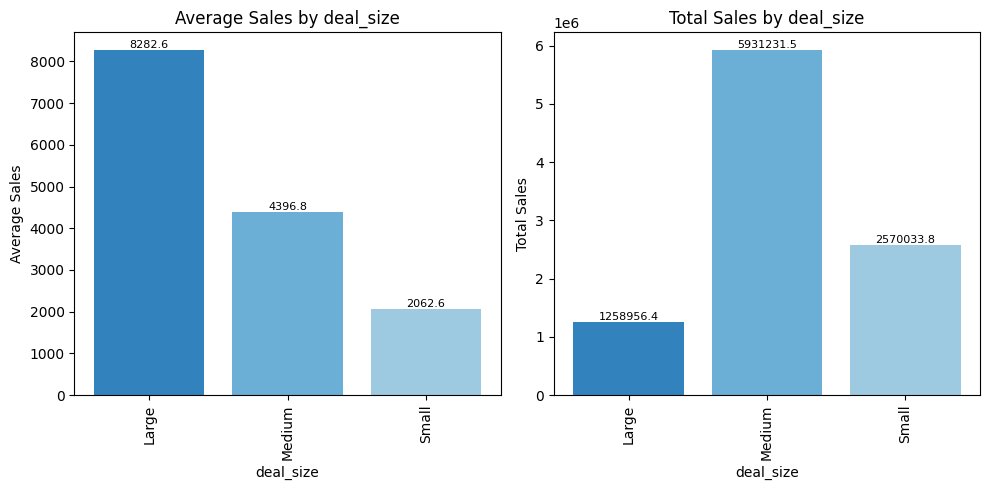

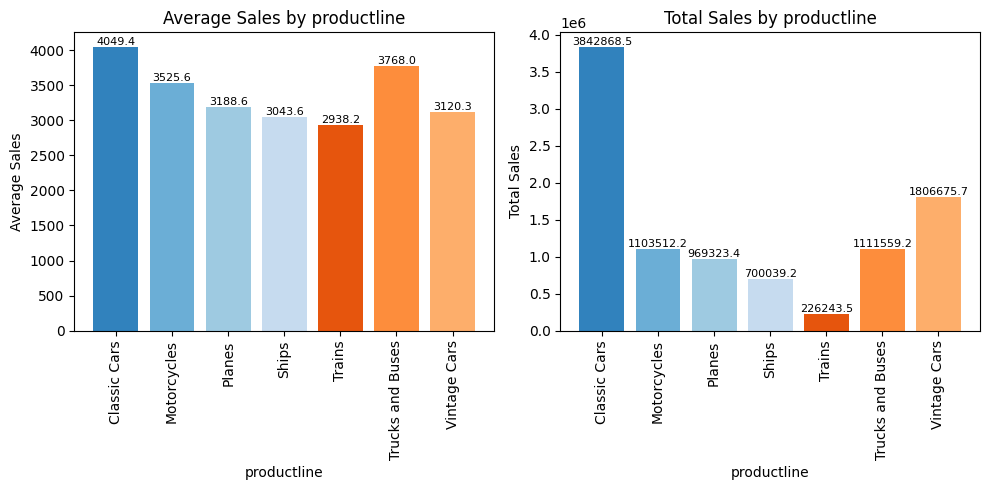

In [27]:
sales_distribution(df,['deal_size','productline'],'sales')

### MULTIVARIATE ANALYSIS

#### Total Sales over the years for the Deal Size

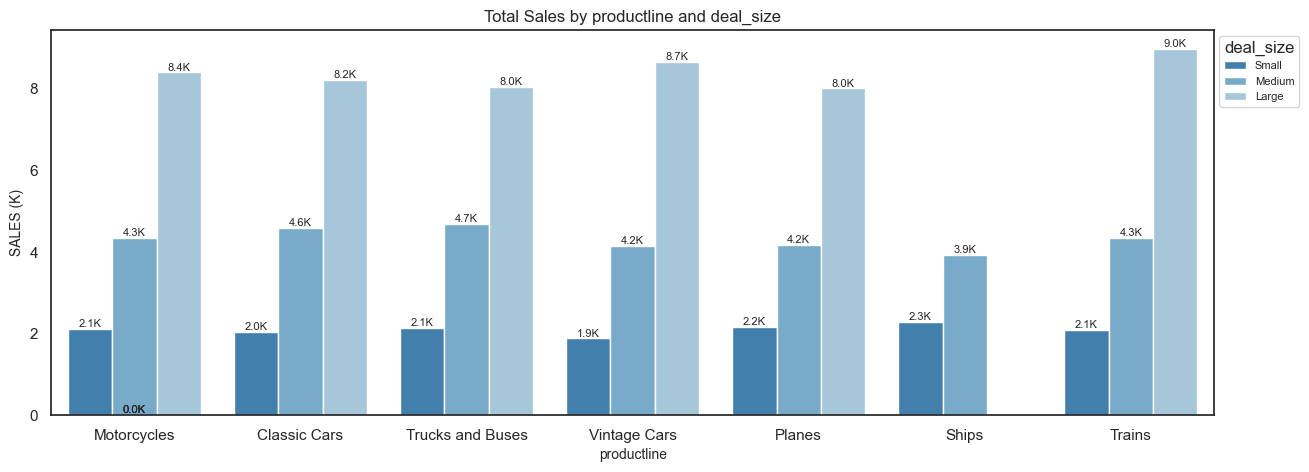

In [28]:
multivariate_analysis(df,'productline','deal_size')

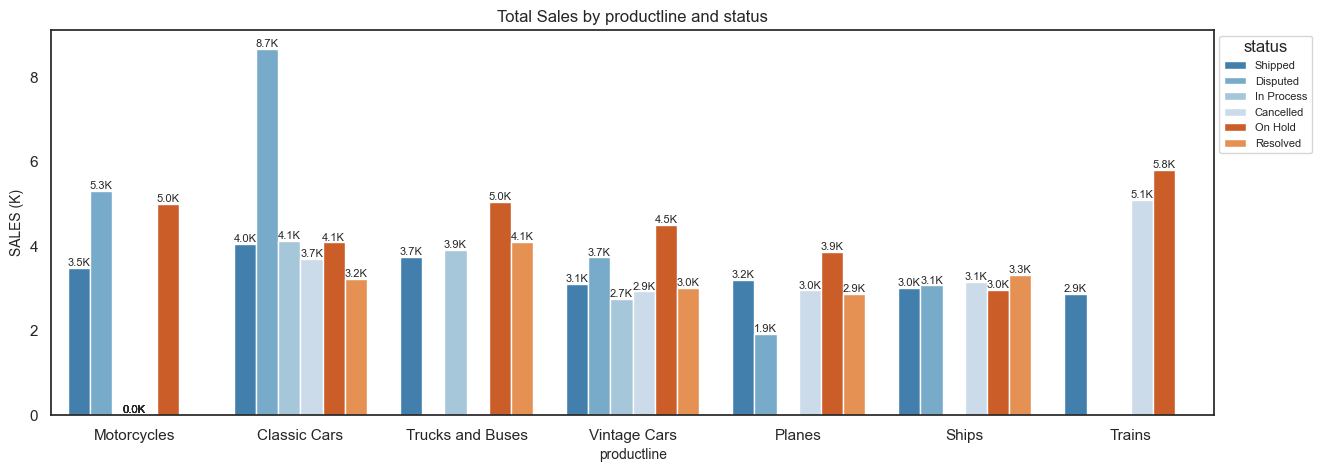

In [29]:
# Total Sales distribution by productline and status
multivariate_analysis(df,'productline','status')

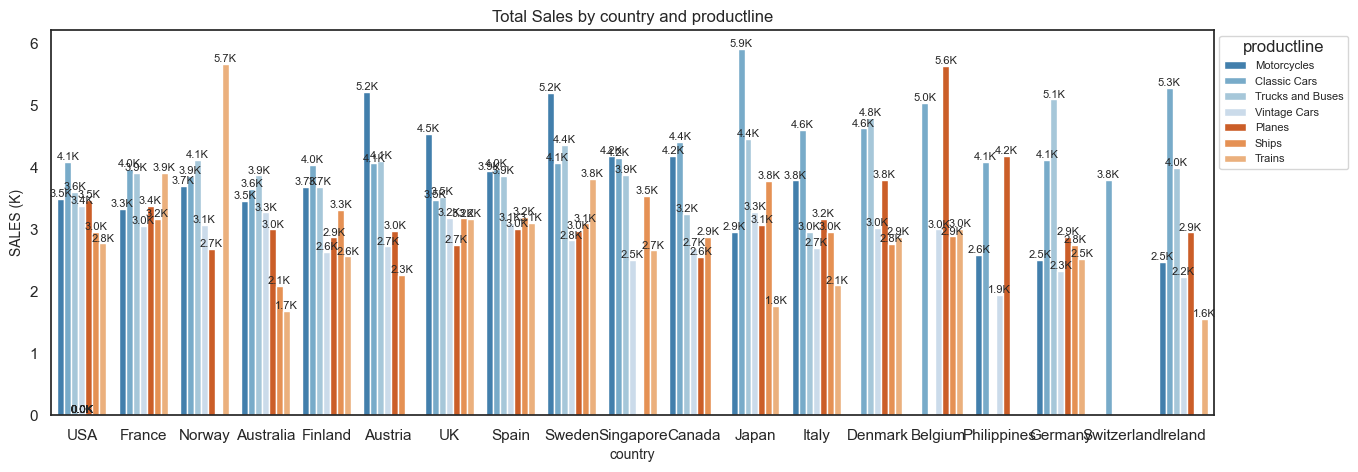

In [30]:
multivariate_analysis(df,'country','productline')

In [31]:
# Extract year, month, week, and quarter from order_date
df['Year'] = df['order_date'].dt.year
df['Month'] = df['order_date'].dt.month
df['Week'] = df['order_date'].dt.isocalendar().week
df['Quarter'] = df['order_date'].dt.quarter

### COHORT ANALYSIS

In [32]:
#function to return month from the order date:
def get_month(x): return dt.datetime(x.year,x.month,1)

#fetch and store ordered month based on the ordered date:
df['orderMonth'] = df['order_date'].apply(get_month)
# group the customers by ordered month
customer_group = df.groupby('customer_name')['orderMonth']
# cohort month:
df['cohortMonth'] = customer_group.transform('min')
df.head()

,order_number,quantity_ordered,price_per_unit,orderline_number,sales,order_date,days_since_lastorder,status,productline,retail_price,...,last_name,first_name,deal_size,SALES (K),Year,Month,Week,Quarter,orderMonth,cohortMonth
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,...,Yu,Kwai,Small,2.87100,2018,2,8,1,2018-02-01,2018-02-01
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,...,Henriot,Paul,Small,2.76590,2018,5,19,2,2018-05-01,2018-05-01
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,...,Da Cunha,Daniel,Medium,3.88434,2018,7,26,3,2018-07-01,2018-07-01
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,...,Young,Julie,Medium,3.74670,2018,8,34,3,2018-08-01,2018-08-01
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,...,Hirano,Juri,Medium,3.47976,2018,10,43,4,2018-10-01,2018-07-01


###### Calculating the time offset for each transaction allows you to evaluate the metrics for each cohort in a comparable fashion.

In [33]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day
# Getting the integers for date parts from the `orderMonth` column
transcation_year, transaction_month, _ = get_date_int(df, 'orderMonth')
# Getting the integers for date parts from the `cohortMonth` column
cohort_year, cohort_month, _ = get_date_int(df, 'cohortMonth')

In [34]:
#Get the  difference in years
years_diff = transcation_year - cohort_year
# Calculate difference in months
months_diff = transaction_month - cohort_month
""" Extract the difference in months from all previous values
 "+1" in addeded at the end so that first month is marked as 1 instead of 0 for easier interpretation. 
 """
df['cohortIndex'] = years_diff * 12 + months_diff  + 1 
print(df.head(5))

   order_number  quantity_ordered  price_per_unit  orderline_number    sales  \
0         10107                30           95.70                 2  2871.00   
1         10121                34           81.35                 5  2765.90   
2         10134                41           94.74                 2  3884.34   
3         10145                45           83.26                 6  3746.70   
4         10168                36           96.66                 1  3479.76   

  order_date  days_since_lastorder   status  productline  retail_price  ...  \
0 2018-02-24                   828  Shipped  Motorcycles            95  ...   
1 2018-05-07                   757  Shipped  Motorcycles            95  ...   
2 2018-07-01                   703  Shipped  Motorcycles            95  ...   
3 2018-08-25                   649  Shipped  Motorcycles            95  ...   
4 2018-10-28                   586  Shipped  Motorcycles            95  ...   

  first_name deal_size SALES (K)  Year Month

###### Here, at first, we create a group() object with CohortMonth and CohortIndex and store it as a grouping.Then, we call this object, select the customer_id column and calculate the average.Then we store the results as cohort_data. Then, we reset the index before calling the pivot function to be able to access the columns now stored as indices.Finally, we create a pivot table bypassing CohortMonth to the index parameter,CohortIndex to the columns parameter,customer_id to the values parameter and rounding it up to 1 digit, and see what we get.

In [35]:
# Counting daily active user from each chort
grouping = df.groupby(['cohortMonth', 'cohortIndex'])
# Counting number of unique customer Id's falling in each group of CohortMonth and CohortIndex
cohort_data = grouping['customer_name'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
 # Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='cohortMonth',
                                 columns ='cohortIndex',
                                 values = 'customer_name')
# Printing top 5 rows of Dataframe
cohort_data.head()

,cohortMonth,cohortIndex,customer_name
0,2018-01-01,1,5
1,2018-01-01,6,1
2,2018-01-01,9,1
3,2018-01-01,10,3
4,2018-01-01,11,2


### RETENTION RATE

In [36]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
# Coverting the retention rate into percentage and Rounding off.
retention.round(1)*100

cohortIndex,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,29
cohortMonth,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,NaN,NaN,NaN,NaN,20.0,NaN,NaN,20.0,60.0,...,NaN,20.0,NaN,40.0,80.0,20.0,NaN,20.0,20.0,20.0
2018-02-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,...,NaN,30.0,NaN,100.0,NaN,NaN,NaN,NaN,30.0,NaN
2018-03-01,100.0,NaN,NaN,NaN,20.0,20.0,NaN,NaN,40.0,NaN,...,NaN,40.0,100.0,20.0,20.0,20.0,20.0,NaN,20.0,NaN
2018-04-01,100.0,10.0,NaN,NaN,10.0,10.0,30.0,10.0,NaN,NaN,...,NaN,90.0,NaN,10.0,NaN,10.0,NaN,10.0,NaN,NaN
2018-05-01,100.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN,20.0,NaN,...,100.0,20.0,20.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN
2018-06-01,100.0,NaN,NaN,20.0,NaN,20.0,20.0,NaN,NaN,NaN,...,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-01,100.0,NaN,NaN,20.0,20.0,NaN,NaN,NaN,NaN,NaN,...,20.0,NaN,50.0,NaN,20.0,NaN,NaN,NaN,NaN,NaN
2018-08-01,100.0,NaN,NaN,70.0,NaN,NaN,NaN,NaN,NaN,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,100.0,NaN,40.0,NaN,NaN,20.0,NaN,20.0,NaN,NaN,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


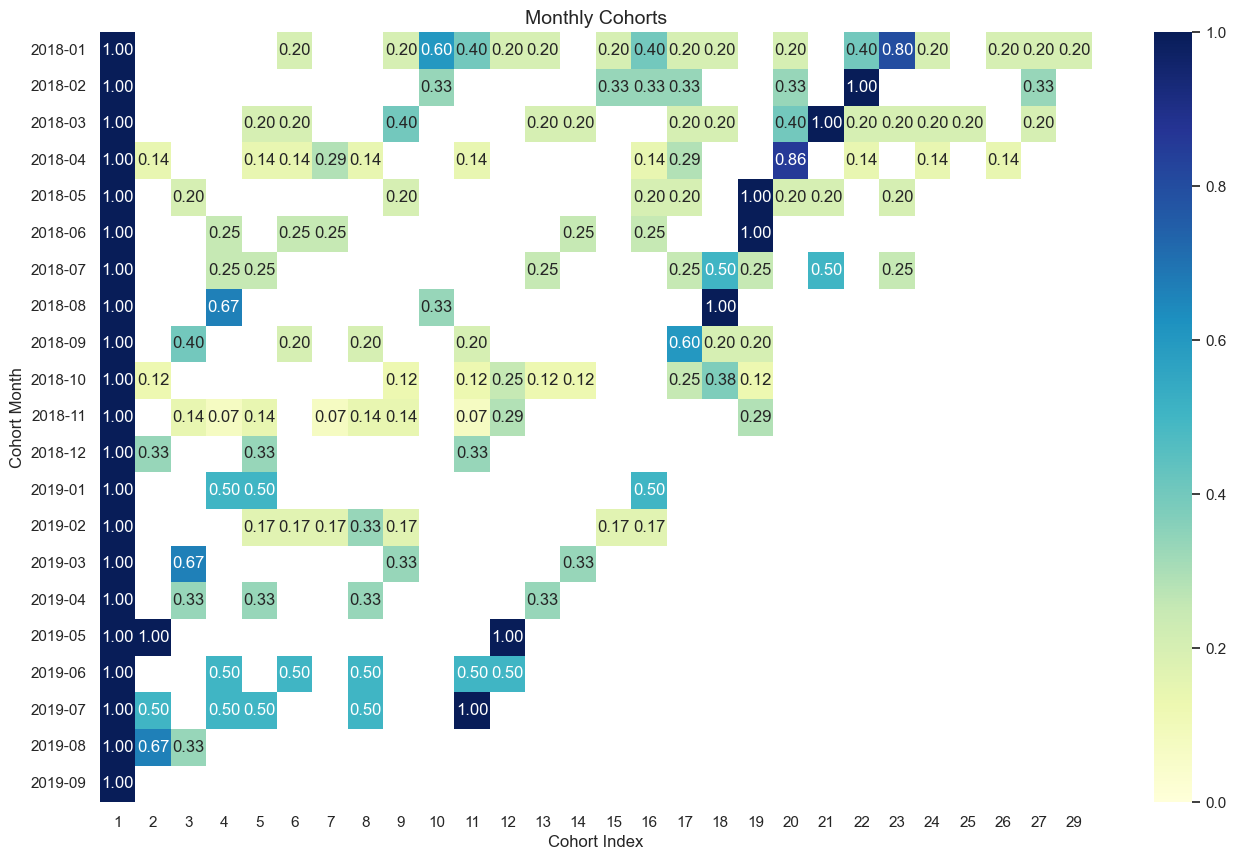

In [37]:
if isinstance(retention.index, pd.DatetimeIndex):
    # Convert the DatetimeIndex to string with the desired format
    retention.index = retention.index.strftime('%Y-%m')

# Initialize the figure
plt.figure(figsize=(16, 10))

# Adding a title
plt.title('Monthly Cohorts', fontsize=14)

# Creating the heatmap
sns.heatmap(retention, annot=True, vmin=0.0, vmax=1, cmap="YlGnBu", fmt='.2f')

plt.ylabel('Cohort Month', fontsize=12)
plt.xlabel('Cohort Index', fontsize=12)

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

plt.show()
